In [118]:
import sqlite3 
from sqlite3 import Error 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [119]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [120]:
connection = create_connection("SQL_marketing_new.db")

Connection to SQLite DB successful


In [121]:
df = pd.read_csv('marketing_campaign.csv', sep = ';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.to_sql('marketing_campaign', connection, if_exists='replace', index=False)

2240

In [6]:
synthetic = pd.read_csv('marketing_synthetic.csv')
synthetic.head(3)

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown


In [7]:
synthetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            31480 non-null  int64  
 1   target                        31480 non-null  object 
 2   day                           31480 non-null  int64  
 3   month                         31480 non-null  object 
 4   duration                      31480 non-null  int64  
 5   contactId                     31480 non-null  int64  
 6   age                           31480 non-null  int64  
 7   gender                        31480 non-null  object 
 8   job                           31480 non-null  object 
 9   maritalStatus                 31480 non-null  object 
 10  education                     31480 non-null  object 
 11  creditFailure                 31480 non-null  object 
 12  accountBalance                31480 non-null  int64  
 13  h

In [8]:
synthetic.to_sql('synthetic', connection, if_exists='replace', index=False)

31480

Источник данных: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [122]:
# linked with 'order_id', 'customer_id'
df_orders = pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv')

# linked with 'order_id'
df_order_payments = pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv')

# linked with 'order_id', 'product_id', 'seller_id'
df_order_items = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')

# linked with 'product_id'
df_products = pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv')

# linked with 'customer_id', 'zip_code_prefix'
df_customers = pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')

# linked with 'customer_id', 'zip_code_prefix'
df_sellers = pd.read_csv('brazilian-ecommerce/olist_sellers_dataset.csv')

# linked with 'seller_id'
df_products_cat_translated = pd.read_csv('brazilian-ecommerce/product_category_name_translation.csv')

display("orders", df_orders.head(1), "order_payments", df_order_payments.head(1),
        "order_reivews", df_order_reviews.head(1), "order_items", df_order_items.head(1),
        "products", df_products.head(1), "products_cat_translated", df_products_cat_translated.head(1),
        "customers", df_customers.head(1), "sellers", df_sellers.head(1))

'orders'

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


'order_payments'

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33


'order_reivews'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


'order_items'

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


'products'

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0


'products_cat_translated'

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty


'customers'

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


'sellers'

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


Проверим статусы заказов:

In [123]:
df_orders['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [124]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [125]:
df_orders[df_orders['order_status']=='approved'].isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
dtype: int64

In [126]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [127]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [128]:
tmp = df_order_reviews[df_order_reviews['review_id'].duplicated()]
tmp['review_id'].value_counts(ascending=False)

4d0e6dd087008d1f992d25ef6e1f619f    2
32415bbf6e341d5d517080a796f79b5c    2
2172867fd5b1a55f98fe4608e1547b4b    2
e44840754f12fad2b8646712121b349a    2
7b606b0d57b078384f0b58eac1d41d78    2
                                   ..
34e1fc15273c269b6fd0227340a23bc4    1
15c9136f43468a8428316d9871eaf14d    1
28d0d8241ef547ebff745da0b395e7cf    1
28642ce6250b94cc72bc85960aec6c62    1
44d1e9165ec54b1d89d33594856af859    1
Name: review_id, Length: 789, dtype: int64

In [129]:
df_order_reviews[df_order_reviews['review_id'] == '4d0e6dd087008d1f992d25ef6e1f619f']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7654,4d0e6dd087008d1f992d25ef6e1f619f,d415e95816c2f3a2a34e06cd519157cc,4,NaN,NaN,2018-06-12 00:00:00,2018-06-17 23:48:04
15469,4d0e6dd087008d1f992d25ef6e1f619f,cd0343141ac675cd40fab2c7fd2e99cc,4,NaN,NaN,2018-06-12 00:00:00,2018-06-17 23:48:04
50202,4d0e6dd087008d1f992d25ef6e1f619f,97f95535ada31d6fa853230e815ee4e3,4,NaN,NaN,2018-06-12 00:00:00,2018-06-17 23:48:04


In [130]:
tmp = df_order_reviews[df_order_reviews['order_id'].duplicated()]
tmp['order_id'].value_counts(ascending=False)

df56136b8031ecd28e200bb18e6ddb2e    2
8e17072ec97ce29f0e1f111e598b0c85    2
03c939fd7fd3b38f8485a0f95798f1f6    2
c88b1d1b157a9999ce368f218a407141    2
18fdcbdf78e62bac03cf30b6b9398087    1
                                   ..
e40ad49e77913b7176bc3268c18b3299    1
15fc22aad8d1b227891ce61eff4128cd    1
dd73d93a25e576d8dae52c7c66b3becf    1
dab8a6c6bd6ec448df5b3a6b6cb887bc    1
3e93213bb8fdda91186b4018b2fe0030    1
Name: order_id, Length: 547, dtype: int64

In [131]:
df_order_reviews[df_order_reviews['order_id'] == 'df56136b8031ecd28e200bb18e6ddb2e']

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
2952,c444278834184f72b1484dfe47de7f97,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-08 00:00:00,2017-02-14 13:58:48
13982,72a1098d5b410ae50fbc0509d26daeb9,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-07 00:00:00,2017-02-10 10:46:09
62728,44f3e54834d23c5570c1d010824d4d59,df56136b8031ecd28e200bb18e6ddb2e,5,NaN,NaN,2017-02-09 00:00:00,2017-02-09 09:07:28


In [132]:
df_order_reviews['review_answer_timestamp'] = pd.to_datetime(df_order_reviews['review_answer_timestamp'])

In [133]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [134]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [135]:
df_order_items['order_id'].duplicated().sum() 

13984

In [136]:
df_order_items['order_id'].nunique()

98666

In [137]:
temp=df_order_items[df_order_items['order_id'].duplicated()==True]
temp['order_id'].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    20
ab14fdcfbe524636d65ee38360e22ce8    19
1b15974a0141d54e36626dca3fdc731a    19
9ef13efd6949e4573a18964dd1bbe7f5    14
428a2f660dc84138d969ccd69a0ab6d5    14
                                    ..
6006d946799bcba9a9fd13e50c442213     1
5ffef190f82ef1609e36ce56abdde5e9     1
5ffbbd67f14392efe8fd533d38cd1338     1
5ff9ebf728452fa38327107ff79df804     1
7f6aacad04768429ee0301c97da50b35     1
Name: order_id, Length: 9803, dtype: int64

In [138]:
df_order_items[df_order_items['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [139]:
df_order_items['product_id'].value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: product_id, Length: 32951, dtype: int64

In [140]:
df_order_items.loc[df_order_items['freight_value']==0,'product_id'].value_counts()

53b36df67ebb7c41585e8d54d6772e08    187
aca2eb7d00ea1a7b8ebd4e68314663af     98
422879e10f46682990de24d770e7f83d     56
7a10781637204d8d10485c71a6108a2e     27
f1c7f353075ce59d8a6f3cf58f419c9c      9
5a848e4ab52fd5445cdc07aab1c40e48      2
81fe540cb0119e1d4ef5f191701b3cb9      1
2b4609f8948be18874494203496bc318      1
2a34e0af5f72ca6cdeb148377a247c86      1
4fcb3d9a5f4871e8362dfedbdb02b064      1
Name: product_id, dtype: int64

In [141]:
df_order_items[df_order_items['product_id']=='53b36df67ebb7c41585e8d54d6772e08']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.90,0.00
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.90,0.00
1974,047d317db3c34ff477eee816660e44f0,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2017-10-02 03:35:43,134.90,12.44
2047,049c844d7707d97ba1600196919474f4,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-03-05 16:35:43,128.89,15.65
2079,04af63a78c7e84943b8377fe1b7871aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-04-03 10:50:16,115.00,18.69
...,...,...,...,...,...,...,...
110720,fb8e4428d340ab5bfa482ef6fc97efbc,5,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2017-09-08 08:44:16,169.90,12.69
111101,fc6d96687311cbd6670c447e7eea25dc,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-04-23 09:51:26,110.00,13.21
111121,fc785ee76910f164cc65821f006a58d5,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2017-06-20 09:25:24,163.00,12.64
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.90,0.00


In [142]:
df_order_items['shipping_limit_date']=pd.to_datetime(df_order_items['shipping_limit_date'])

In [30]:
df_products.info()
# df_products[df_products['product_category_name'].isna()==True]
# df_products['product_category_name'].nunique()
# df_products_cat_translated.info()
# df_products['product_id'].duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [143]:
print(df_products_cat_translated.shape)
df_products_cat_translated.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [146]:
# df_sellers.info()
# df_sellers.head()
# df_sellers['seller_id'].nunique()
display(df_sellers['seller_state'].value_counts().head(5))
display(df_sellers['seller_city'].value_counts().head(5))

SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: seller_state, dtype: int64

sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: seller_city, dtype: int64

In [147]:
df_customers.info()
df_customers.head()
df_customers['customer_unique_id'].nunique()
df_customers['customer_id'].nunique()
temp=df_customers.drop_duplicates(['customer_unique_id'], keep='first')
temp['customer_city'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


sao paulo                  0.155792
rio de janeiro             0.068796
belo horizonte             0.027795
brasilia                   0.021499
curitiba                   0.015214
                             ...   
pontes gestal              0.000010
nossa senhora das dores    0.000010
francisco santos           0.000010
engenheiro balduino        0.000010
eugenio de castro          0.000010
Name: customer_city, Length: 4118, dtype: float64

In [34]:
import sqlite3
from sqlalchemy import create_engine

In [149]:
engine = create_engine('sqlite:///C:\Disk_D\DS_course_mipt\системы обработки данных\seminars\marketing_8_04.db', echo = False)

In [150]:
df_orders.to_sql(name = 'orders', con = engine)
df_order_payments.to_sql(name = 'payments', con = engine)
df_order_reviews.to_sql(name = 'reviews', con = engine)
df_order_items.to_sql(name = 'items', con = engine)
df_products.to_sql(name = 'products', con = engine)
df_products_cat_translated.to_sql(name = 'category_eng', con = engine)
df_customers.to_sql(name = 'customers', con = engine)
df_sellers.to_sql(name = 'sellers', con = engine)

3095

In [151]:
query = "SELECT * FROM sqlite_master"
db = pd.read_sql_query(sql = query, con = engine)
db[db['type'] == 'table']

,type,name,tbl_name,rootpage,sql
0,table,orders,orders,2,"CREATE TABLE orders (\n\t""index"" BIGINT, \n\to..."
2,table,payments,payments,5857,"CREATE TABLE payments (\n\t""index"" BIGINT, \n\..."
4,table,reviews,reviews,7876,"CREATE TABLE reviews (\n\t""index"" BIGINT, \n\t..."
6,table,items,items,12132,"CREATE TABLE items (\n\t""index"" BIGINT, \n\tor..."
8,table,products,products,16839,"CREATE TABLE products (\n\t""index"" BIGINT, \n\..."
10,table,category_eng,category_eng,17533,"CREATE TABLE category_eng (\n\t""index"" BIGINT,..."
12,table,customers,customers,17535,"CREATE TABLE customers (\n\t""index"" BIGINT, \n..."
14,table,sellers,sellers,20177,"CREATE TABLE sellers (\n\t""index"" BIGINT, \n\t..."


Проверим типы полей в таблицах:

In [152]:
for i in db[db['type'] == 'table']['sql']:
    print(i)

CREATE TABLE orders (
	"index" BIGINT, 
	order_id TEXT, 
	customer_id TEXT, 
	order_status TEXT, 
	order_purchase_timestamp DATETIME, 
	order_approved_at DATETIME, 
	order_delivered_carrier_date DATETIME, 
	order_delivered_customer_date DATETIME, 
	order_estimated_delivery_date DATETIME
)
CREATE TABLE payments (
	"index" BIGINT, 
	order_id TEXT, 
	payment_sequential BIGINT, 
	payment_type TEXT, 
	payment_installments BIGINT, 
	payment_value FLOAT
)
CREATE TABLE reviews (
	"index" BIGINT, 
	review_id TEXT, 
	order_id TEXT, 
	review_score BIGINT, 
	review_comment_title TEXT, 
	review_comment_message TEXT, 
	review_creation_date TEXT, 
	review_answer_timestamp DATETIME
)
CREATE TABLE items (
	"index" BIGINT, 
	order_id TEXT, 
	order_item_id BIGINT, 
	product_id TEXT, 
	seller_id TEXT, 
	shipping_limit_date DATETIME, 
	price FLOAT, 
	freight_value FLOAT
)
CREATE TABLE products (
	"index" BIGINT, 
	product_id TEXT, 
	product_category_name TEXT, 
	product_name_lenght FLOAT, 
	product_descrip

In [153]:
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina')

### MAU (Monthly Active Users)

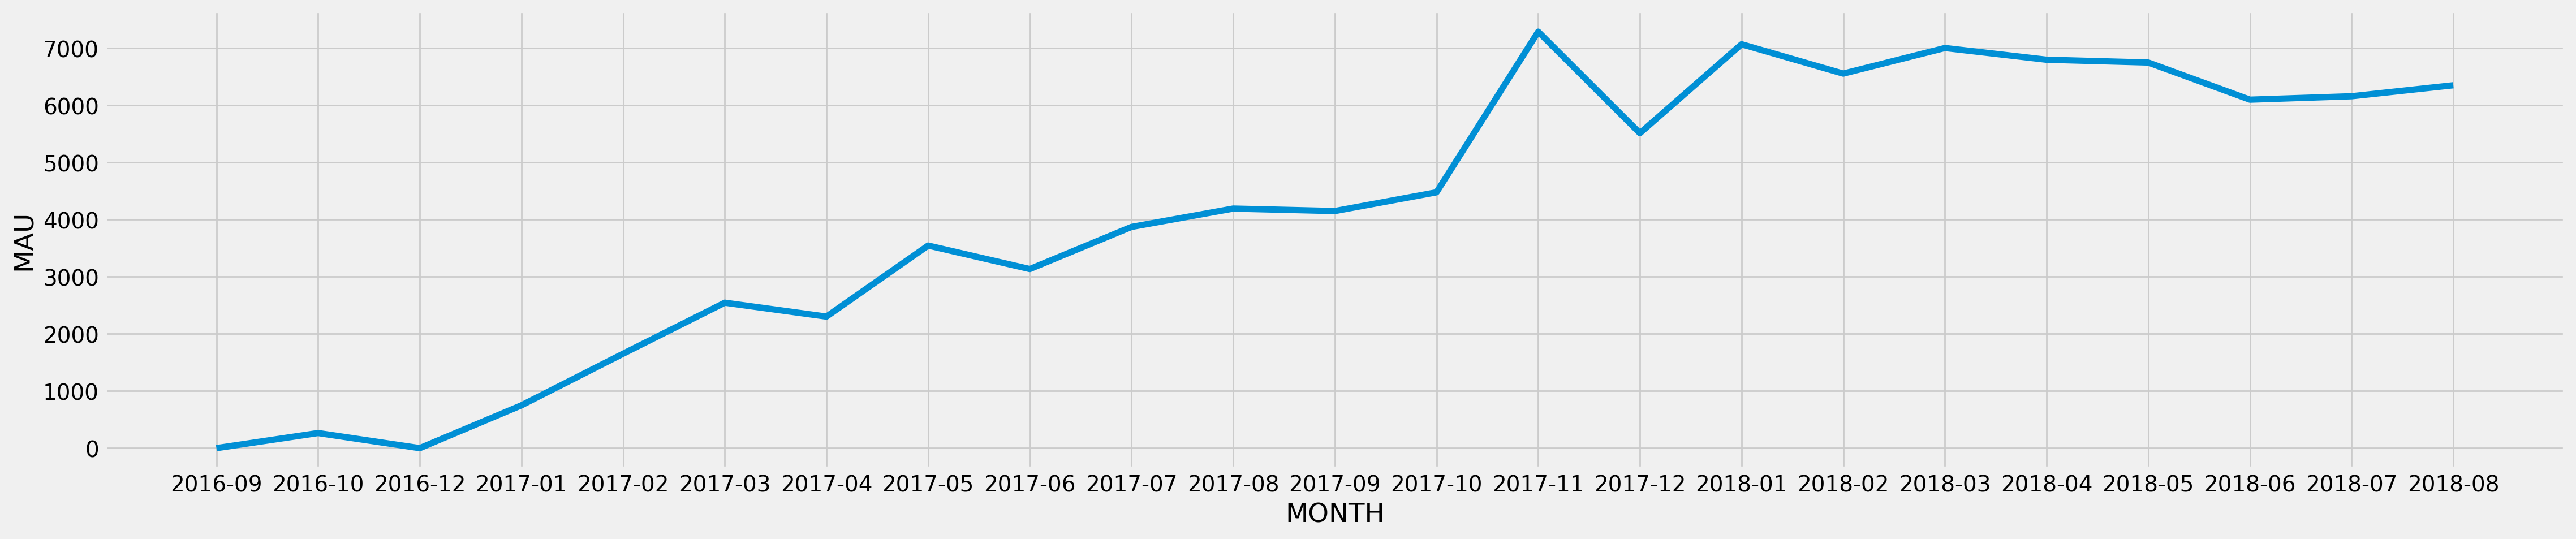

In [154]:
mau = """
        select t.month as MONTH, count(t.customer_unique_id) as MAU
        from
            (select strftime('%Y-%m', order_purchase_timestamp) as month, o.order_id, c.customer_unique_id
            from orders as o
            left join customers as c
                on o.customer_id=c.customer_id
            where o.order_status='delivered'
            group by month, o.order_id, c. customer_unique_id) as t
        group by t.month
        order by t.month
        """
mau=pd.read_sql_query(mau, engine)
plt.figure(figsize=(25,5))
sns.lineplot(data=mau, x='MONTH', y='MAU');

In [155]:
fig = px.line(mau, x='MONTH', y='MAU', title='Monthly Active Users')
fig.show()

### DAU (Daily Active Users)

Выберем для анализа декабрь 2017 года.

In [156]:
dau = """
        select t.day as DAY, count(t.customer_unique_id) as DAU
        from
            (select strftime('%d', order_purchase_timestamp) as day, c.customer_unique_id
            from orders as o
            left join customers as c
                on o.customer_id=c.customer_id
            where o.order_status='delivered' and strftime('%Y-%m', order_purchase_timestamp) = '2017-12'
            group by day, c. customer_unique_id) as t
        group by DAY
        order by DAY
        """
dau=pd.read_sql_query(dau, engine)

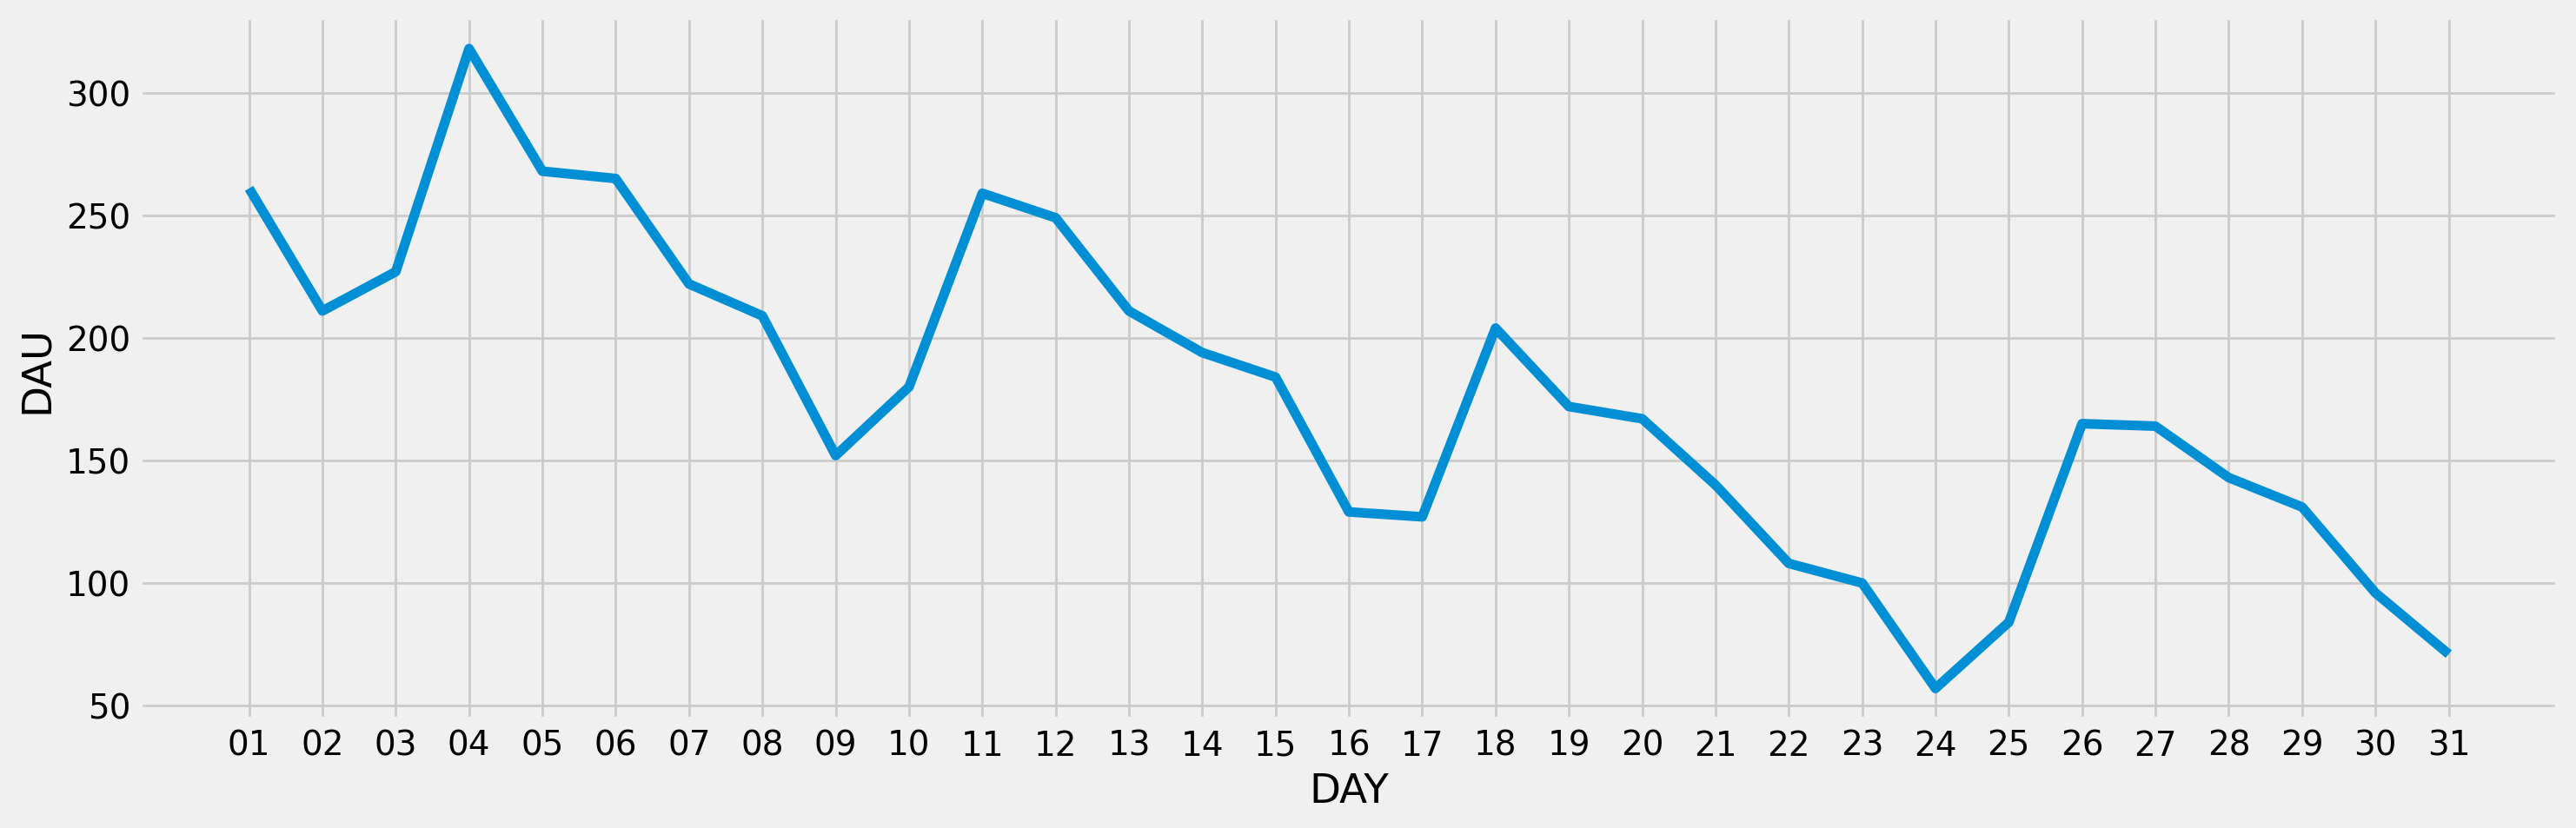

In [157]:
plt.figure(figsize=(16,5))
sns.lineplot(data=dau, x='DAY', y='DAU');

In [158]:
fig = px.line(dau, x='DAY', y='DAU', title='Dayly Active Users')
fig.show()

### Daily New User

In [159]:
daily_new_user = """
                select strftime('%m-%d',temp.september) as day, count(temp.new_customer) as daily_new_user
                from
                    (select c.customer_unique_id as new_customer, min(strftime('%Y-%m-%d', order_purchase_timestamp)) as september
                    from orders as o
                    left join customers as c
                        on c.customer_id=o.customer_id
                    where strftime('%Y-%m', order_purchase_timestamp)='2017-09'
                    group by c.customer_unique_id) as temp
                group by temp.september
                order by temp.september
                """
dnu=pd.read_sql_query(daily_new_user, engine)

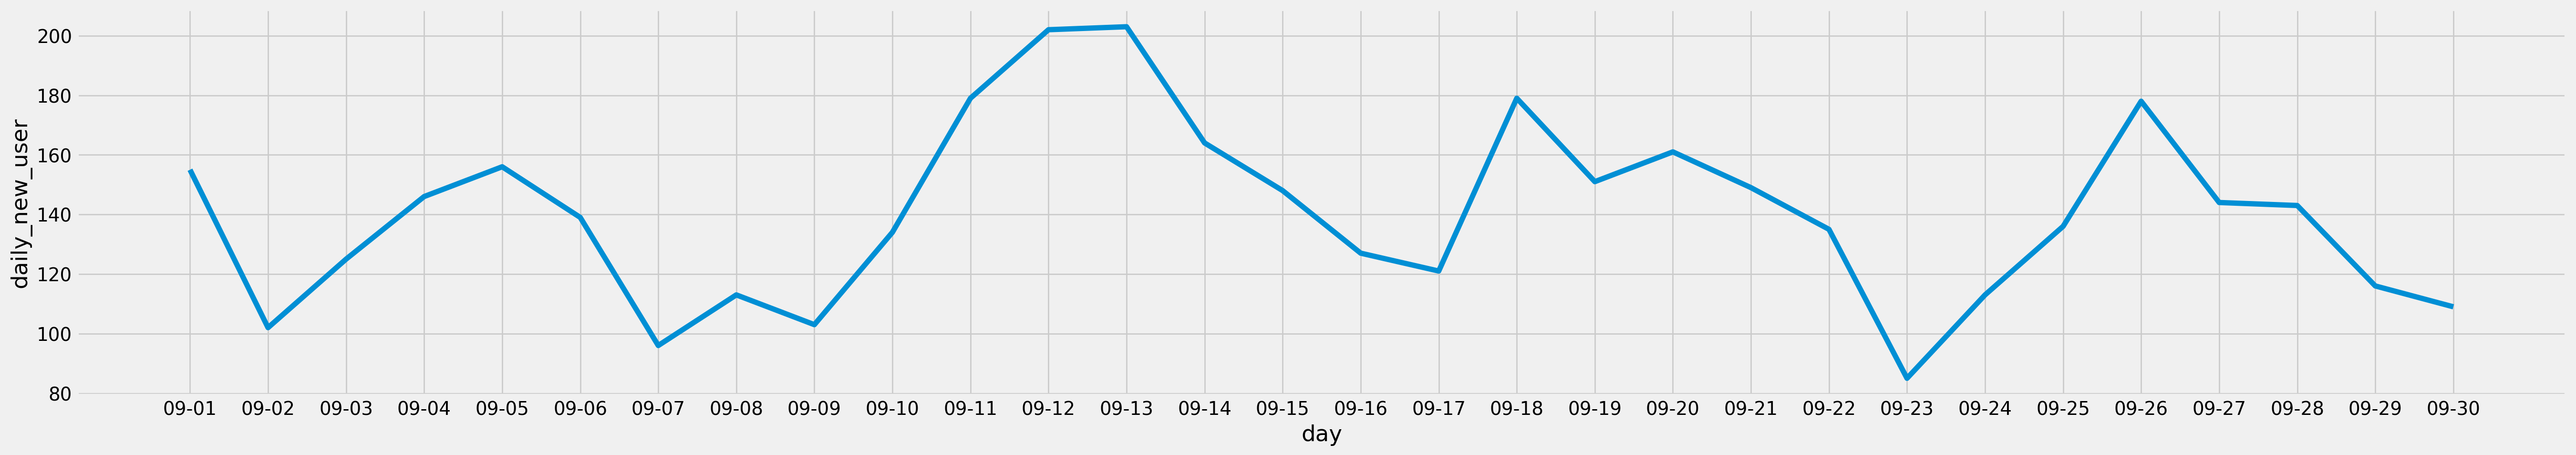

In [160]:
plt.figure(figsize=(30,5))
sns.lineplot(data=dnu, x='day', y='daily_new_user');

In [161]:
dnu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   day             30 non-null     object
 1   daily_new_user  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [163]:
dnu['day'] = pd.to_datetime(dnu['day'], format='%m-%d')

In [164]:
dnu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   day             30 non-null     datetime64[ns]
 1   daily_new_user  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 608.0 bytes


In [165]:
fig = px.line(dnu, x='day', y='daily_new_user', title='Dayly New Users')
fig.show()

### Revenue Per Visitor - daily

In [166]:
RPV = """
    select rt.day, round(rt.revenue/visitor.visitor_cnt) as rpv
    
    from
        (select strftime('%m-%d', o.order_purchase_timestamp) as day, sum(i.price) as revenue
        from orders as o
        left join items as i
            on o.order_id=i.order_id
        where o.order_status not in ('unavailable','canceled') and strftime('%Y-%m', o.order_purchase_timestamp)='2017-09'
        group by day) as rt
        
    inner join
        (select strftime('%m-%d', o.order_purchase_timestamp) as day, count(c.customer_unique_id) as visitor_cnt
        from orders as o
        left join customers as c
            on o.customer_id=c.customer_id
        where strftime('%Y-%m', o.order_purchase_timestamp)='2017-09'
        group by day) as visitor
        
        on rt.day=visitor.day

    """
rpv=pd.read_sql_query(RPV, engine)

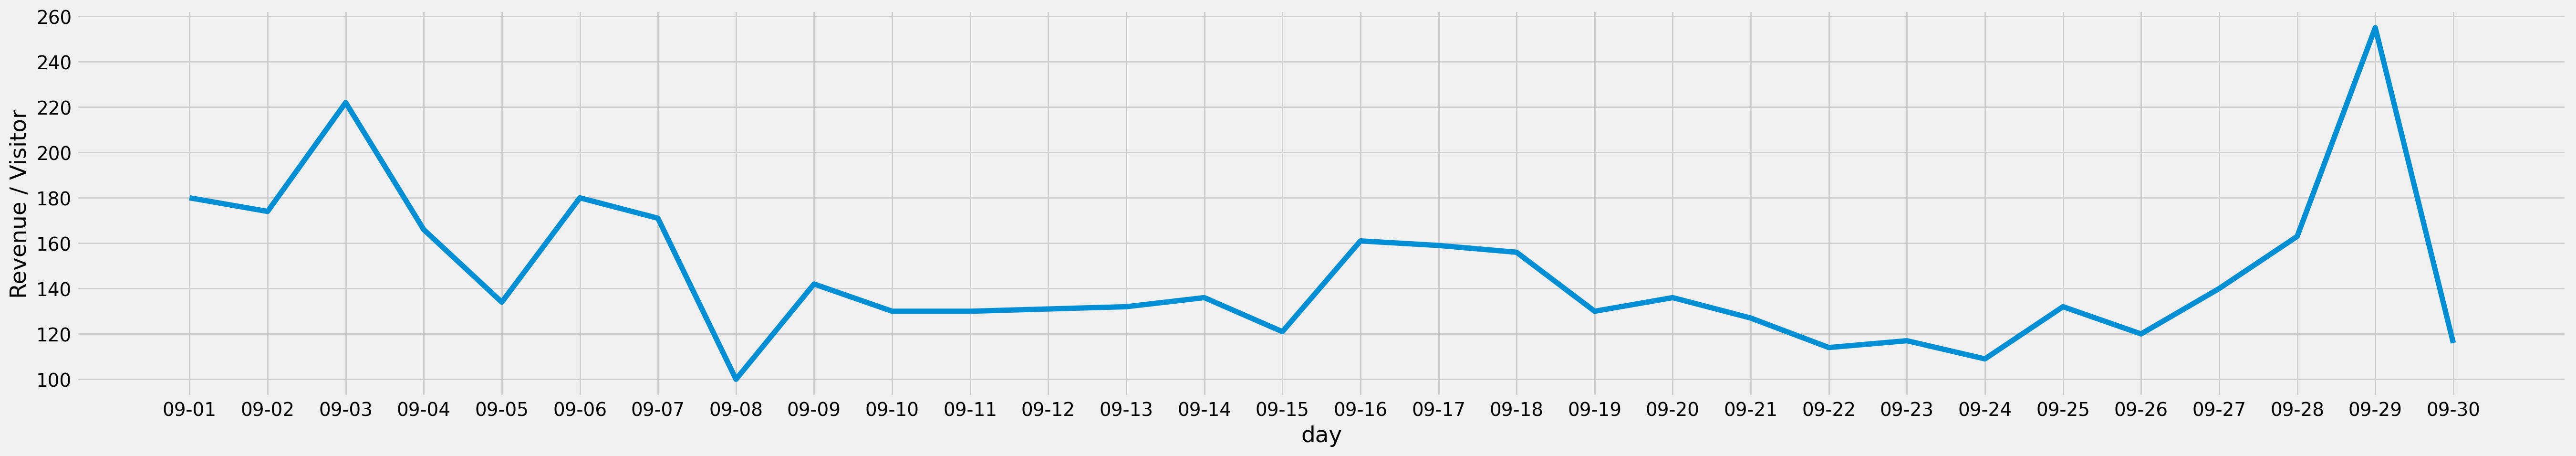

In [167]:
plt.figure(figsize=(30,5))
plt.ylabel('Revenue / Visitor')
sns.lineplot(data=rpv, x='day', y='rpv');

In [168]:
fig = px.line(rpv, x='day', y='rpv', title='Revenue Per Visitor - daily')
fig.show()

### Анализ удовлетворённости пользователей (оценок/рейтинга пользователей)

In [169]:
satisfaction = """
        select t1.year, rating_5, count_all, (round((cast(rating_5 as float)/count_all)*100,2)||'%') as percentage
        from (select strftime('%Y',o.order_purchase_timestamp) as year,sum(1) as rating_5
            from reviews as r
            left join orders as o 
                on o.order_id=r.order_id
            where r.review_score=5 and strftime('%Y',o.order_purchase_timestamp)='2018' and o.order_status='delivered') as t1
            
        inner join 
            (select year,count(t2.order_id) as count_all
            from (select strftime('%Y',o.order_purchase_timestamp) as year, o.order_id
                from reviews as r
                left join orders as o 
                    on o.order_id=r.order_id
                where strftime('%Y',o.order_purchase_timestamp)='2018' and o.order_status='delivered'
                group by o.order_id) as t2) as t3
            on t3.year=t1.year
            
        """

pd.read_sql_query(satisfaction, engine)

,year,rating_5,count_all,percentage
0,2018,31244,52468,59.55%


### Анализ "тренда" покупок

In [170]:
purchse= """
        SELECT 
        case 
            when strftime('%Y',order_purchase_timestamp)='2016' then 2016
            when strftime('%Y',order_purchase_timestamp)='2017' then 2017
            else 2018 end as year, 
        case
            when strftime('%m',order_purchase_timestamp)='01' then 1
            when strftime('%m',order_purchase_timestamp)='02' then 2
            when strftime('%m',order_purchase_timestamp)='03' then 3
            when strftime('%m',order_purchase_timestamp)='04' then 4
            when strftime('%m',order_purchase_timestamp)='05' then 5
            when strftime('%m',order_purchase_timestamp)='06' then 6
            when strftime('%m',order_purchase_timestamp)='07' then 7
            when strftime('%m',order_purchase_timestamp)='08' then 8
            when strftime('%m',order_purchase_timestamp)='09' then 9
            when strftime('%m',order_purchase_timestamp)='10' then 10
            when strftime('%m',order_purchase_timestamp)='11' then 11
            else 12 end as month,
        count(o.order_id) as count
        from orders as o
        where o.order_status not in ('unavailable', 'canceled')
        group by year, month
        order by year, month asc
        """
pur = pd.read_sql_query(purchse,engine)

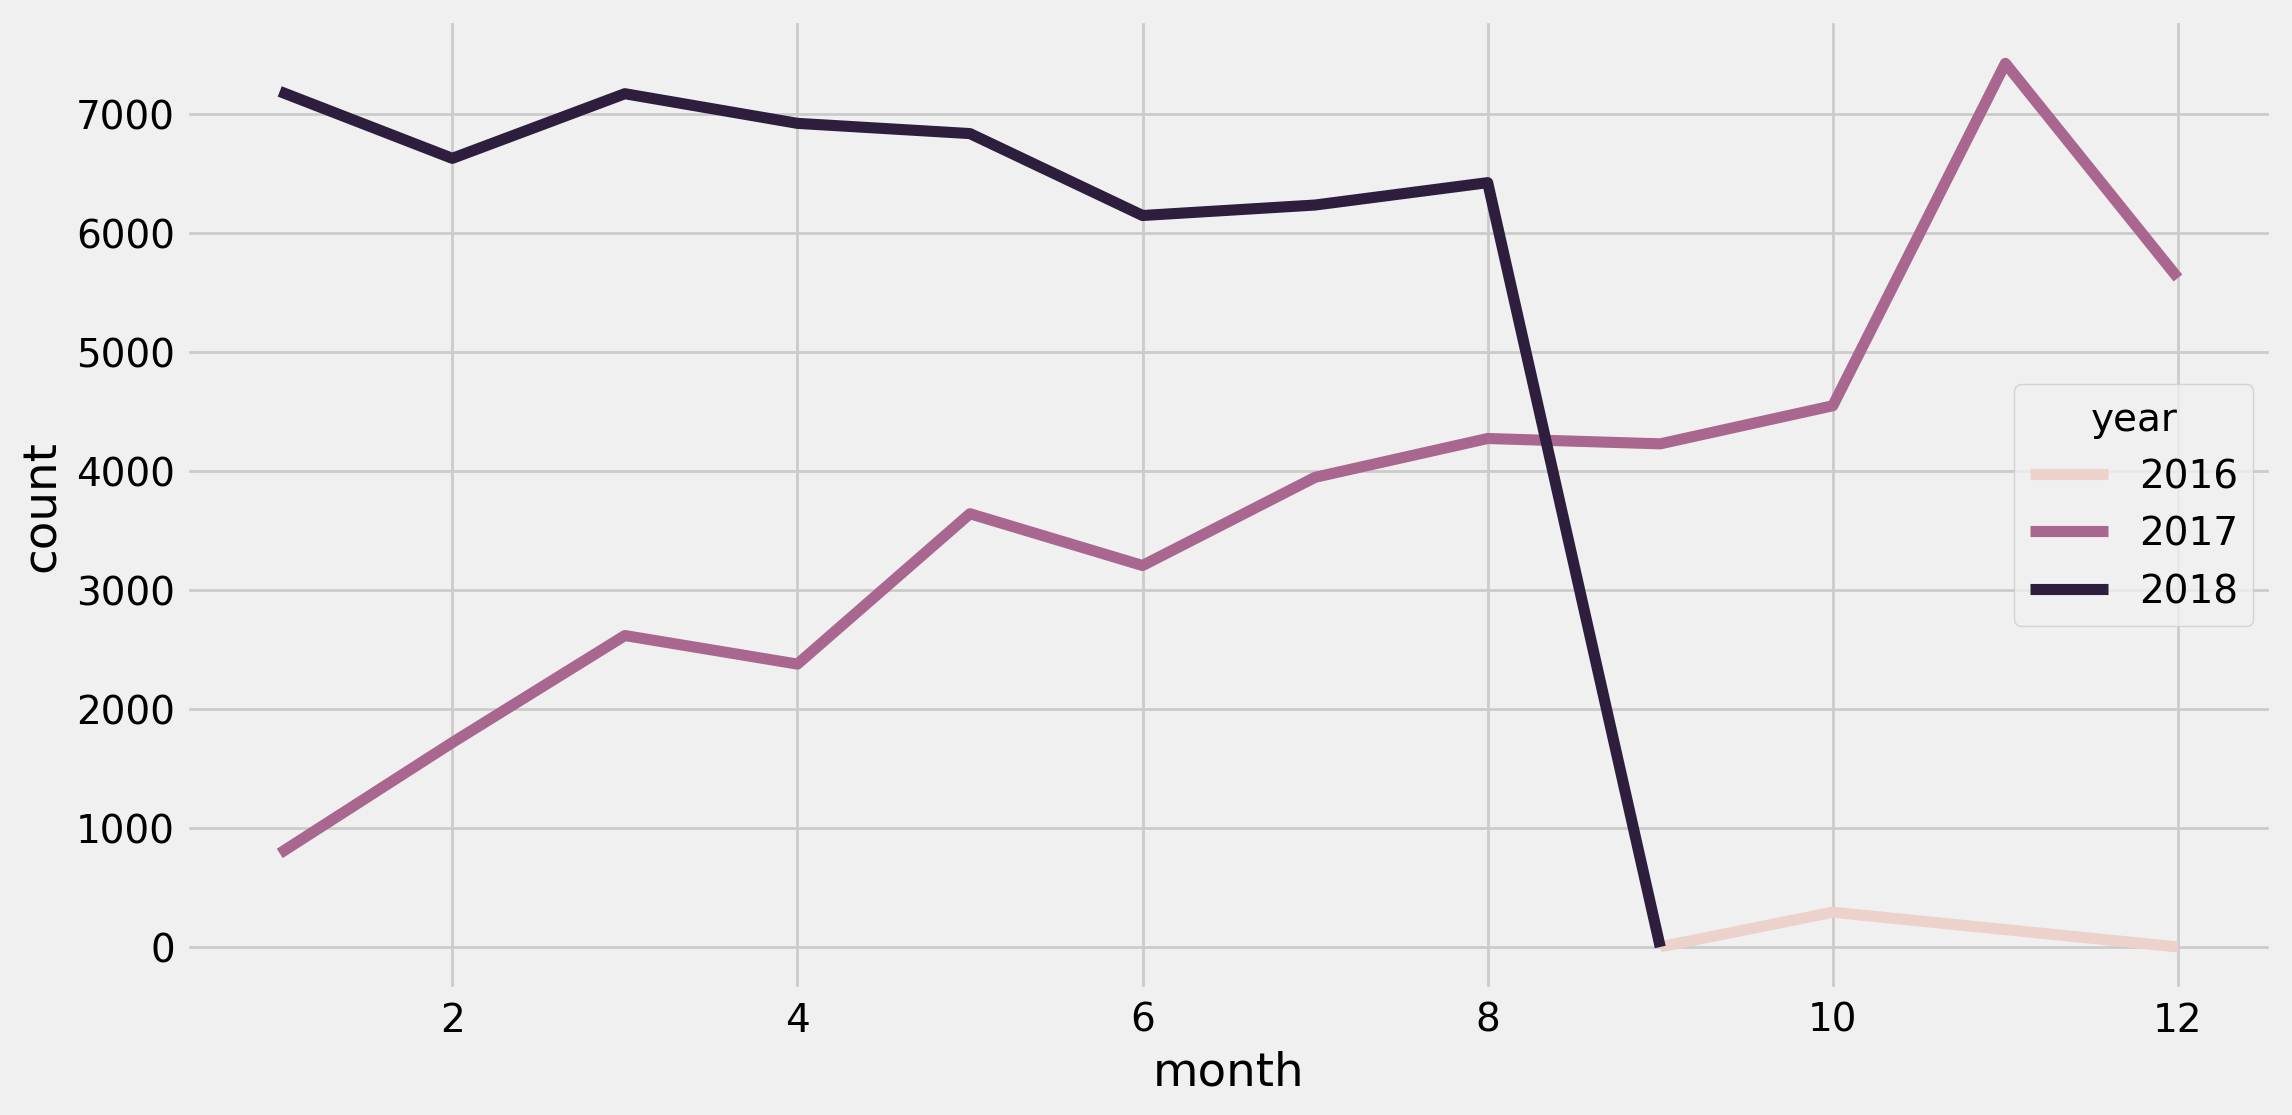

In [171]:
plt.figure(figsize=(12,6))
sns.lineplot(data=pur,x='month',y='count',hue='year');

In [173]:
month_group=pur.groupby('month').sum('count').reset_index()
year_group=pur.groupby('year').sum('count').reset_index()

In [174]:
display(month_group)
display(year_group)

,month,year,count
0,1,4035,7974
1,2,4035,8343
2,3,4035,9785
3,4,4035,9296
4,5,4035,10473
5,6,4035,9350
6,7,4035,10179
7,8,4035,10693
8,9,6051,4230
9,10,4033,4840


,year,month,count
0,2016,31,296
1,2017,78,44379
2,2018,45,53532


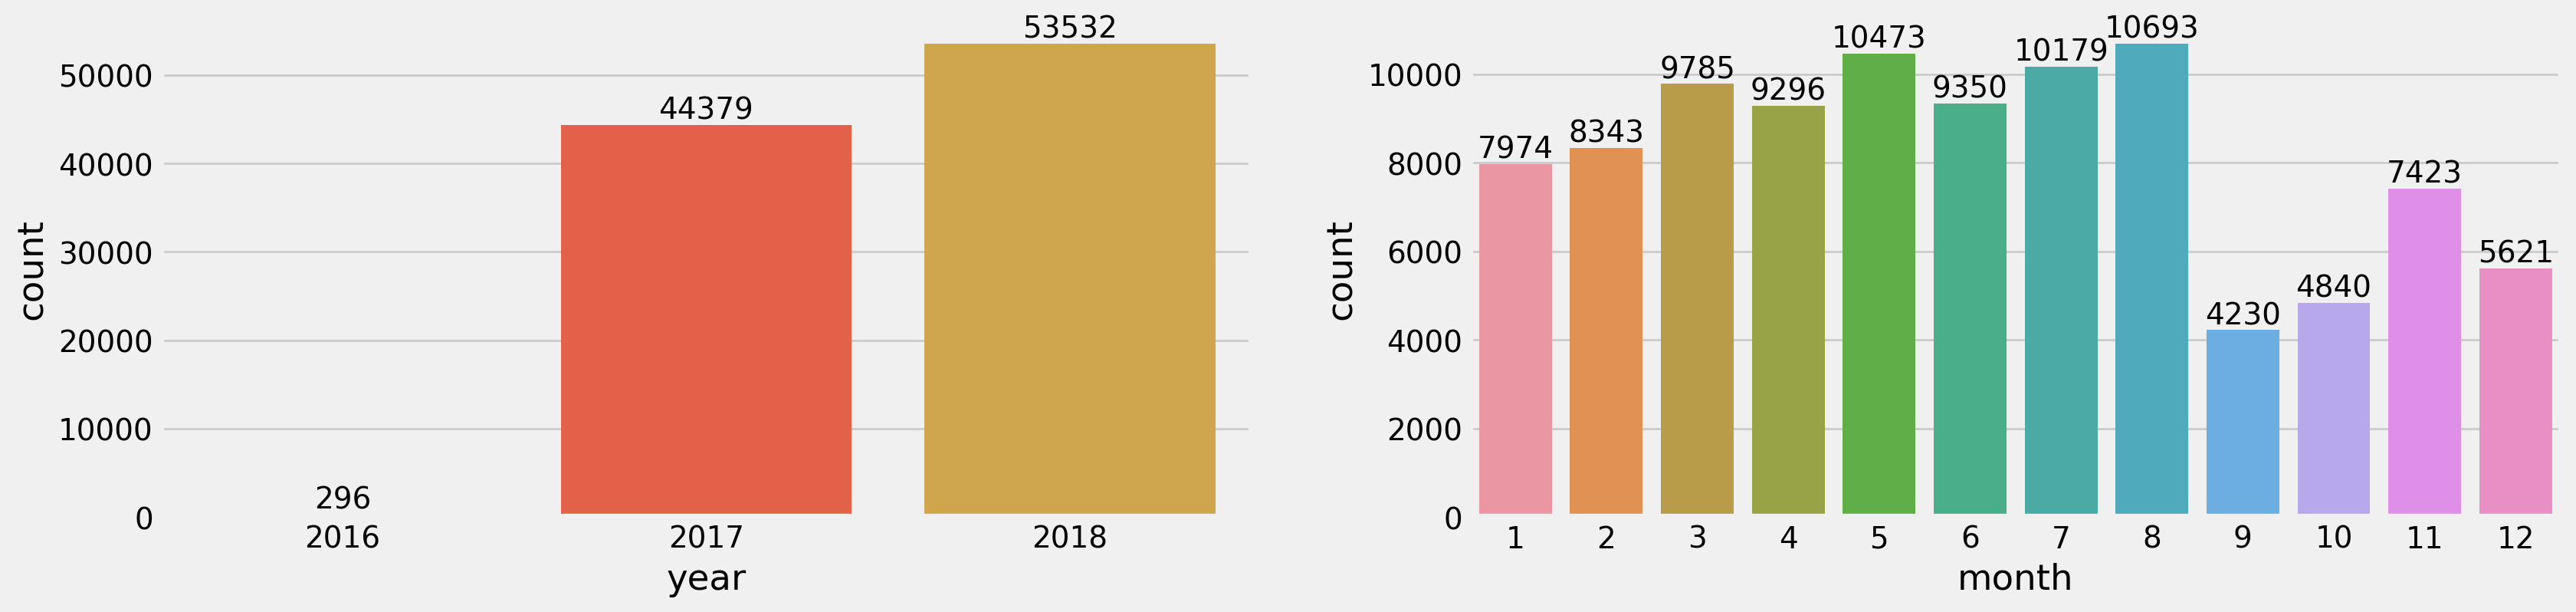

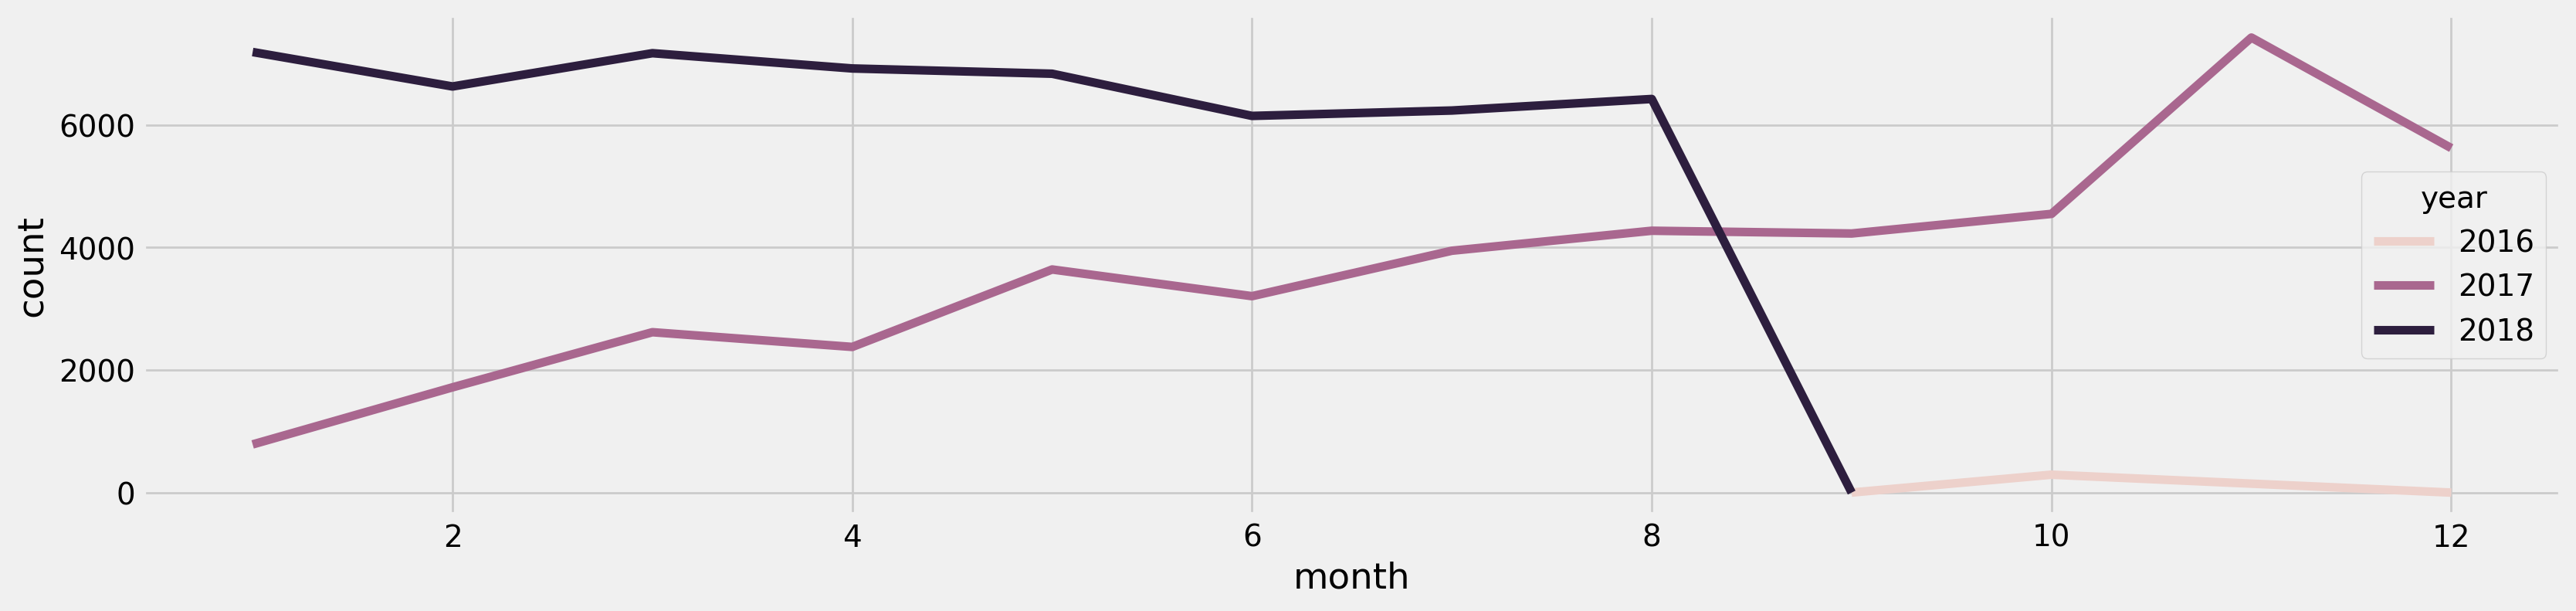

In [175]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.barplot(data = year_group, x = 'year', y = 'count', ax=ax1)
sns.barplot(data = month_group, x = 'month', y = 'count', ax=ax2)
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])

fig, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.lineplot(data=pur,x='month',y='count',hue='year',color='red',ax=ax3)

plt.show()

### Тип Payment

In [177]:
payment = """
        select p.payment_type,count(o.order_id) as count_orders, cast(sum(p.payment_value)/1000 as integer) as sum_of_value_devided_K
        from payments as p
        left join orders as o
            on p.order_id=o.order_id
        where o.order_status<>'canceled' and o.order_delivered_customer_date is not null
        group by p.payment_type
        """

pay = pd.read_sql_query(payment , engine).sort_values(by='count_orders',ascending=False)
pay

,payment_type,count_orders,sum_of_value_devided_K
1,credit_card,74579,12100
0,boleto,19191,2769
3,voucher,5493,343
2,debit_card,1485,208


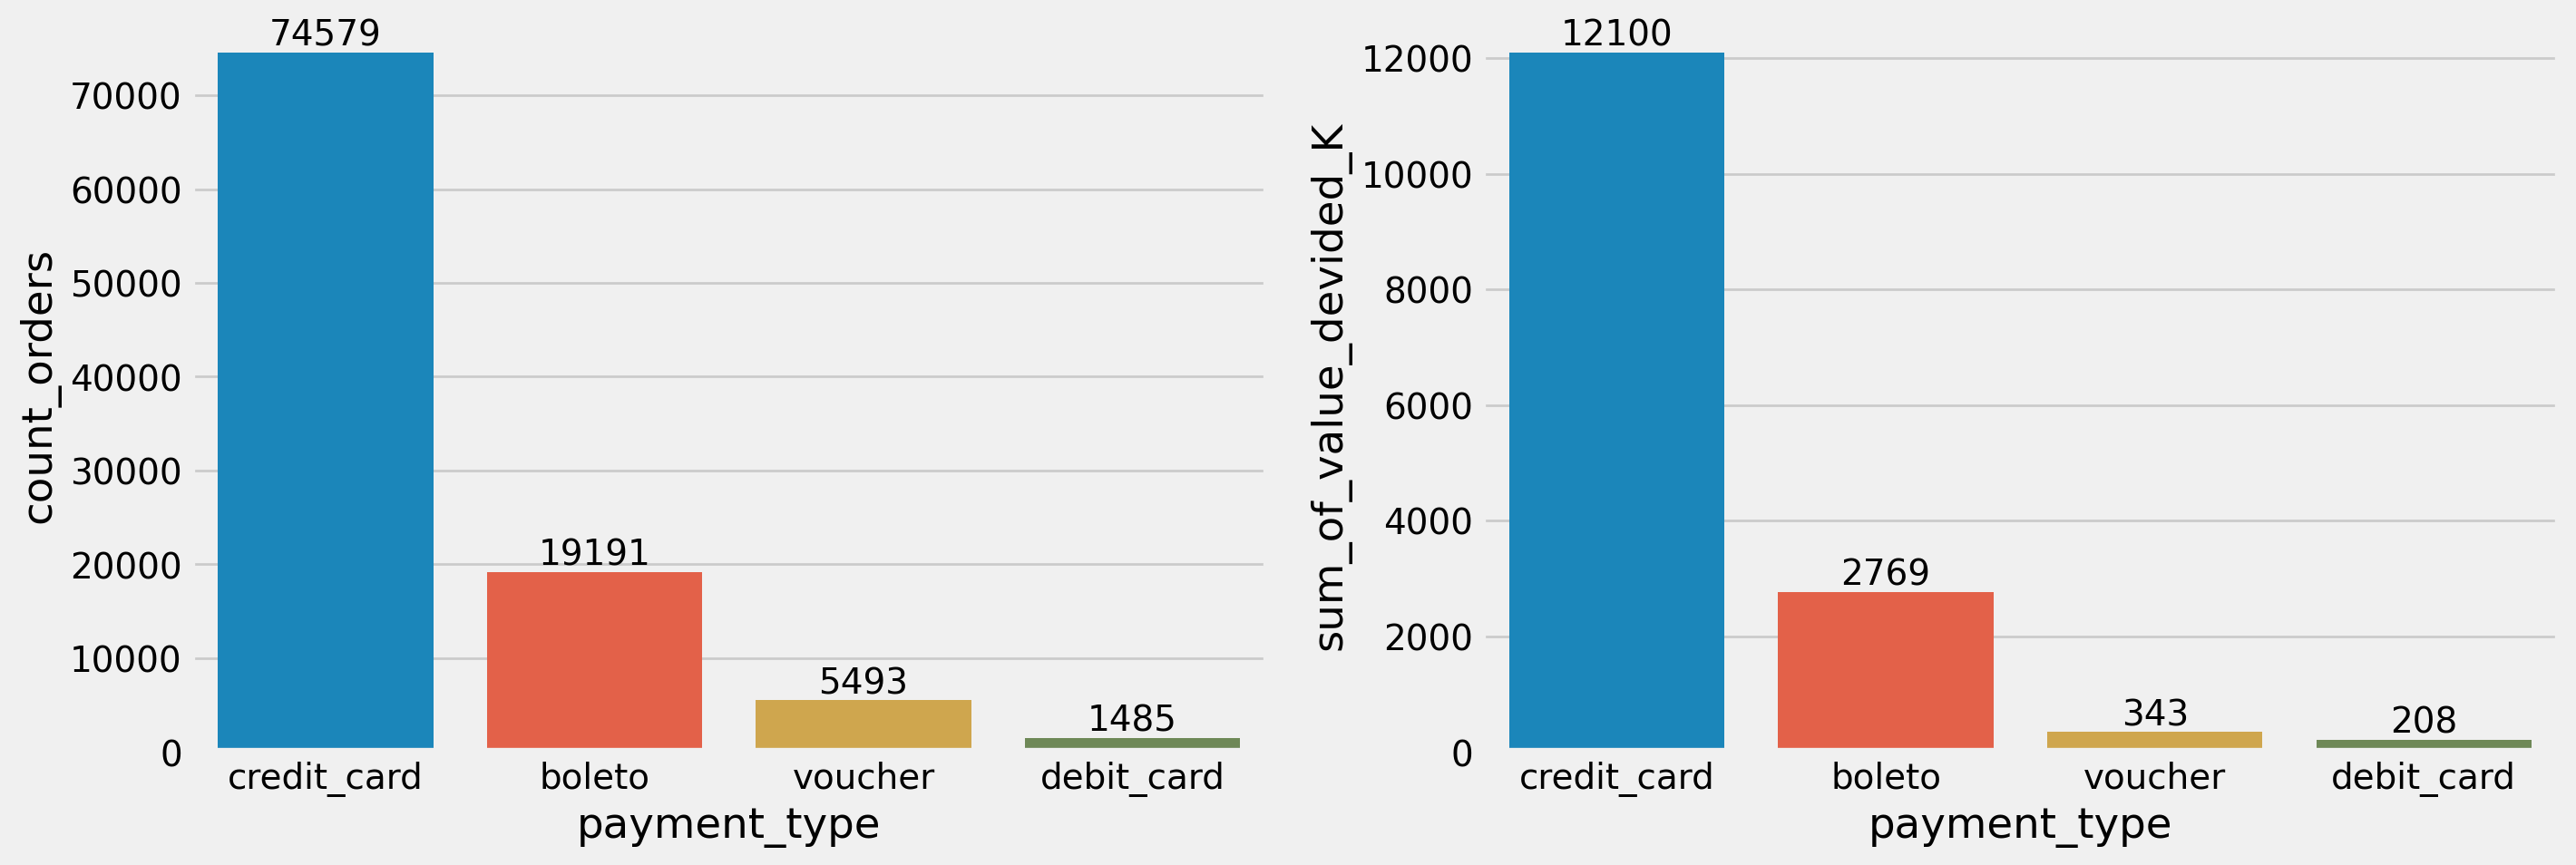

In [178]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(data=pay, x='payment_type', y = 'count_orders', ax = axes[0])
axes[0].bar_label(axes[0].containers[0])

sns.barplot(data=pay, x='payment_type', y = 'sum_of_value_devided_K', ax = axes[1])
axes[1].bar_label(axes[1].containers[0])

plt.show()

In [179]:
max_10 = """
        with cte as (
            select pcn,count(oid) as distinct_orders
            from (select p.product_category_name as pcn, o.order_id as oid
                from orders as o
                left join items as  i
                    on o.order_id=i.order_id
                left join products as p
                    on p.product_id=i.product_id
                left join category_eng as trns
                    on p.product_category_name=trns.product_category_name
                where trns.product_category_name_english is not null and o.order_status<>'canceled' and o.order_delivered_customer_date is not null
                group by pcn, oid) as t
            group by pcn)
            
        select trns.product_category_name_english as Category_in_eng, distinct_orders, sum(pay.payment_value) as revenue
        from products as p
        left join category_eng as trns
            on p.product_category_name=trns.product_category_name
        left join items as i
            on i.product_id=p.product_id
        left join orders as o
            on i.order_id=o.order_id
        left join payments as pay
            on pay.order_id=o.order_id
        left join cte
            on cte.pcn=p.product_category_name
        where Category_in_eng is not null and o.order_status <> 'canceled' and o.order_delivered_customer_date is not null
        group by Category_in_eng
        order by revenue desc
        limit 10
        """

In [180]:
min_10 = """
        with cte as (
            select pcn,count(oid) as distinct_orders
            from (select p.product_category_name as pcn, o.order_id as oid
                from orders as o
                left join items as  i
                    on o.order_id=i.order_id
                left join products as p
                    on p.product_id=i.product_id
                left join category_eng as trns
                    on p.product_category_name=trns.product_category_name
                where trns.product_category_name_english is not null and o.order_status<>'canceled' and o.order_delivered_customer_date is not null
                group by pcn, oid) as t
            group by pcn)
            
        select trns.product_category_name_english as Category_in_eng, distinct_orders, sum(pay.payment_value) as revenue
        from products as p
        left join category_eng as trns
            on p.product_category_name=trns.product_category_name
        left join items as i
            on i.product_id=p.product_id
        left join orders as o
            on i.order_id=o.order_id
        left join payments as pay
            on pay.order_id=o.order_id
        left join cte
            on cte.pcn=p.product_category_name
        where Category_in_eng is not null and o.order_status <> 'canceled' and o.order_delivered_customer_date is not null
        group by Category_in_eng
        order by revenue 
        limit 10
        """

In [181]:
max10 = pd.read_sql_query(max_10, engine)
min10 = pd.read_sql_query(min_10, engine)
display(max10, min10)

,Category_in_eng,distinct_orders,revenue
0,bed_bath_table,9272,1692714.28
1,health_beauty,8647,1620684.04
2,computers_accessories,6529,1549252.47
3,furniture_decor,6307,1394466.93
4,watches_gifts,5493,1387046.31
5,sports_leisure,7529,1349252.93
6,housewares,5743,1069787.97
7,auto,3809,833610.84
8,garden_tools,3448,810614.93
9,cool_stuff,3559,744649.32


,Category_in_eng,distinct_orders,revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,718.98
2,cds_dvds_musicals,12,1199.43
3,home_comfort_2,24,1710.54
4,flowers,29,2213.01
5,arts_and_craftmanship,23,2326.17
6,la_cuisine,13,2913.53
7,fashion_sport,26,3605.83
8,diapers_and_hygiene,25,4126.17
9,fashio_female_clothing,36,4902.67


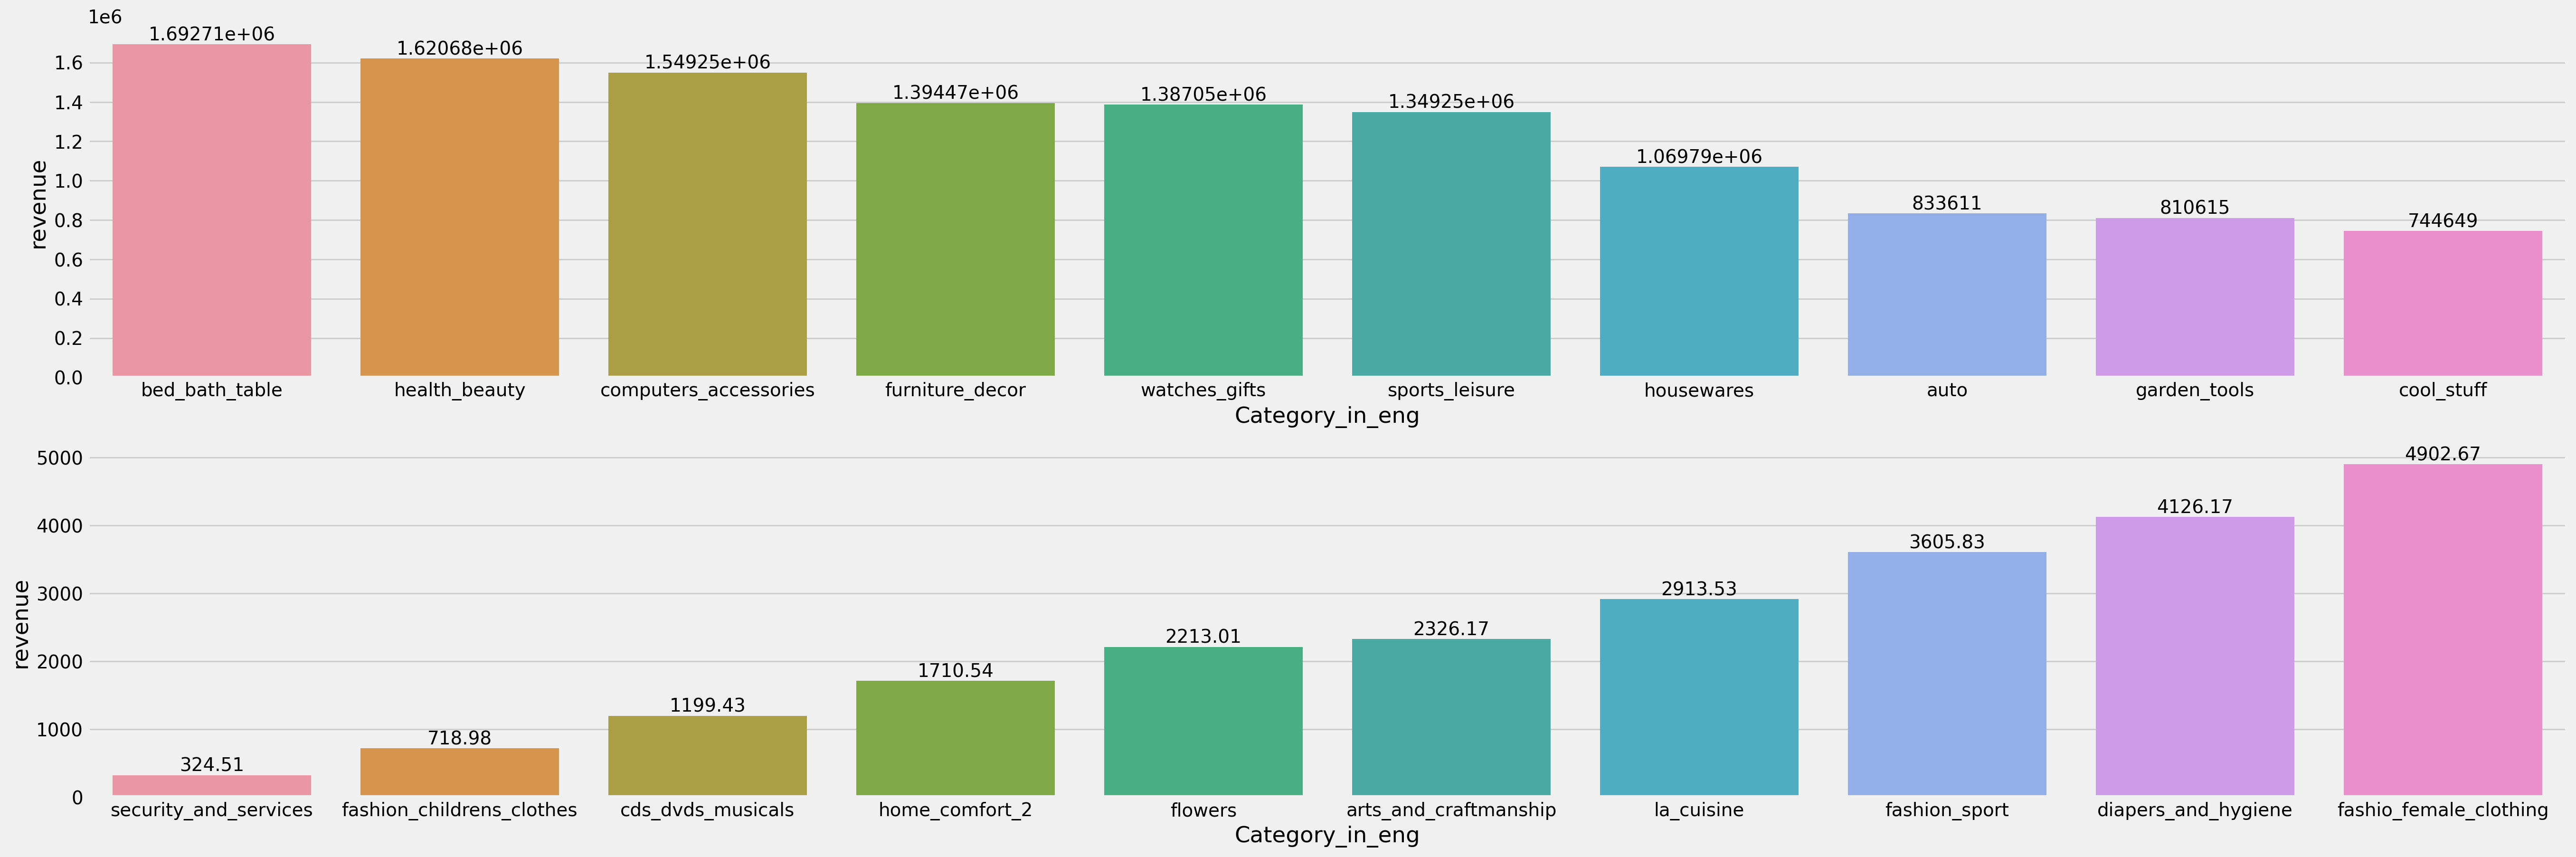

In [182]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,10))

sns.barplot(data=max10, x='Category_in_eng', y = 'revenue', ax = axes[0])
axes[0].bar_label(axes[0].containers[0])

sns.barplot(data=min10, x='Category_in_eng', y = 'revenue', ax = axes[1])
axes[1].bar_label(axes[1].containers[0])

plt.show()

### Анализ выручки

In [184]:
category_top10 = """
        with cte as (select trns.product_category_name_english as category_eng, s.seller_id, sum(pay.payment_value) as revenue,
                        rank() over(partition by trns.product_category_name_english order by sum(pay.payment_value) desc) as rnk
                    from products as p
                    left join category_eng as trns
                        on p.product_category_name=trns.product_category_name
                    left join items as i
                        on i.product_id=p.product_id
                    left join orders as o
                        on i.order_id=o.order_id
                    left join payments as pay
                        on pay.order_id=o.order_id
                    left join sellers as s
                        on s.seller_id=i.seller_id
                    where category_eng is not null and o.order_status <> 'canceled' and o.order_delivered_customer_date is not null
                    group by category_eng, s.seller_id)
                    
            select category_eng, seller_id, revenue
            from cte
            where rnk between 1 and 10
        """

In [185]:
top10_by_category = pd.read_sql_query(category_top10, engine)
top10_by_category

,category_eng,seller_id,revenue
0,agro_industry_and_commerce,e59aa562b9f8076dd550fcddf0e73491,38875.08
1,agro_industry_and_commerce,f08a5b9dd6767129688d001acafc21e5,38203.91
2,agro_industry_and_commerce,6bd69102ab48df500790a8cecfc285c2,8359.02
3,agro_industry_and_commerce,2528744c5ef5d955adc318720a94d2e7,6508.70
4,agro_industry_and_commerce,31ae0774c17fabd06ff707cc5bde005f,5690.23
...,...,...,...
642,watches_gifts,634964b17796e64304cadf1ad3050fb7,76433.52
643,watches_gifts,2bf6a2c1e71bbd29a4ad64e6d3c3629f,54176.72
644,watches_gifts,966cb4760537b1404caedd472cc610a5,47939.28
645,watches_gifts,b33e7c55446eabf8fe1a42d037ac7d6d,39590.53


In [186]:
# 1. Aggregation of revenue by 'state'

query = """
        select c.customer_state as state, sum(pay.payment_value) as revenue
        from orders as o
        left join items as i
            on i.order_id=o.order_id
        left join customers as c
            on c.customer_id=o.customer_id
        left join payments as pay
            on pay.order_id=o.order_id
        where o.order_status <> 'canceled' and o.order_delivered_customer_date is not null
        group by state
        """

In [187]:
state_revenue = pd.read_sql_query(query, engine)
state_revenue.head(5)

,state,revenue
0,AC,24890.49
1,AL,108425.07
2,AM,34503.04
3,AP,21521.71
4,BA,773182.02


In [188]:
state_revenue['state'].value_counts()

AC    1
PB    1
SP    1
SE    1
SC    1
RS    1
RR    1
RO    1
RN    1
RJ    1
PR    1
PI    1
PE    1
PA    1
AL    1
MT    1
MS    1
MG    1
MA    1
GO    1
ES    1
DF    1
CE    1
BA    1
AP    1
AM    1
TO    1
Name: state, dtype: int64

In [190]:
# 2. Top 5 product categories by 'state'

query = """
        with cte as (select c.customer_state as state, p.product_category_name as category, sum(pay.payment_value) as revenue,
                        rank() over(partition by c.customer_state order by sum(pay.payment_value) desc) as rank
                    from orders as o
                    left join items as i
                        on i.order_id=o.order_id
                    left join products as p
                        on i.product_id=p.product_id
                    left join payments as pay
                        on pay.order_id=o.order_id
                    left join customers as c
                        on c.customer_id=o.customer_id
                    where o.order_status <> 'canceled' and o.order_delivered_customer_date is not null
                    group by state, category)
        select state, category, revenue
        from cte
        where rank<=5
        """

In [191]:
top5_by_state_category = pd.read_sql_query(query, engine)
top5_by_state_category

,state,category,revenue
0,AC,moveis_decoracao,5261.23
1,AC,esporte_lazer,2071.54
2,AC,beleza_saude,2067.62
3,AC,informatica_acessorios,1765.24
4,AC,relogios_presentes,1573.72
...,...,...,...
130,TO,beleza_saude,8368.96
131,TO,esporte_lazer,6961.25
132,TO,relogios_presentes,6719.31
133,TO,informatica_acessorios,5201.51


In [192]:
# 3. Number of customers & sellers by 'state'

query = """
        select c.state as state, customer_count, coalesce(seller_count,0) as seller_count
        from (select customer_state as state, count(customer_unique_id) as customer_count
            from (select customer_state, customer_unique_id
                from customers 
                group by customer_state, customer_unique_id) as t1
            group by state) as c
        
        left join (select seller_state as state, count(seller_id) as seller_count
                from (select seller_state, seller_id
                    from sellers
                    group by seller_state, seller_id) as t2
                group by state) as s
            on c.state=s.state
        order by state
        """

In [193]:
seller_customer_cnt = pd.read_sql_query(query, engine)
seller_customer_cnt

,state,customer_count,seller_count
0,AC,77,1
1,AL,401,0
2,AM,143,1
3,AP,67,0
4,BA,3277,19
5,CE,1313,13
6,DF,2075,30
7,ES,1964,23
8,GO,1952,40
9,MA,726,1


### Delivery by State

Мы используем JULIANDAY(), т. к. SQLite не поддерживает функцию DATEDIFF

In [194]:
query = """
        select t.customer_state as state, cast(avg(t.date_diff) as integer) as avg_date_diff
        from (select customer_state, julianday(o.order_estimated_delivery_date) - julianday(o.order_approved_at) as date_diff 
            from customers as c
            left join orders as o
                on c.customer_id=o.customer_id
            where o.order_status <> 'canceled' and o.order_approved_at is not null) as t
        group by state
        """

In [195]:
avg_date_diff = pd.read_sql_query(query, engine)
avg_date_diff

,state,avg_date_diff
0,AC,40
1,AL,32
2,AM,44
3,AP,45
4,BA,28
5,CE,30
6,DF,23
7,ES,25
8,GO,26
9,MA,29


Разделим пользователей на сегменты для анализа заказаов (первого, последнего и т. д.) и последующего расчёта CLA (Customer Lifetime Value)

In [76]:
query = """
        select c.customer_unique_id as customer, min(strftime('%Y-%m-%d', o.order_purchase_timestamp)) as first_purchase, max(strftime('%Y-%m-%d', o.order_purchase_timestamp)) as latest_purchase,
                temp1.order_cnt as count_of_purchase, case when temp1.order_cnt<2 then 'N' else 'Y' end as repurchased, 
                coalesce(cast(avg_repurchase_cycle as integer), 'There was no repurchase') as average_rapurchase_cycle
                
                
        from orders as o
        
        left join customers as c
            on o.customer_id=c.customer_id
            
        left join (
                select cid, count(oid) as order_cnt
                from (select c1.customer_unique_id as cid, o1.order_id as oid
                    from orders as o1
                    left join customers as c1
                        on o1.customer_id=c1.customer_id
                    where o1.order_status<> 'canceled'
                    group by c1.customer_unique_id, o1.order_id) as t
                group by cid) as temp1
            on temp1.cid=c.customer_unique_id
            
        left join items as i
            on o.order_id=i.order_id
            
        left join products as p
            on p.product_id=i.product_id
            
        left join category_eng as translate
            on p.product_category_name=translate.product_category_name
        
        left join (
                select customer_unique_id, avg(julianday(order_purchase_timestamp)-julianday(prev_purchase)) as avg_repurchase_cycle
                from (select c2.customer_unique_id, o2.order_purchase_timestamp, 
                        lag(o2.order_purchase_timestamp) over(partition by c2.customer_unique_id order by o2.order_purchase_timestamp) as prev_purchase
                    from orders as o2
                    left join customers as c2
                        on c2.customer_id=o2.customer_id
                    where o2.order_status<> 'canceled')
                where prev_purchase <> 'None'
                group by customer_unique_id) as temp2
            on temp2.customer_unique_id=c.customer_unique_id
            
        where o.order_status<> 'canceled'
        group by customer
        order by count_of_purchase desc
        """

In [77]:
data_mart = pd.read_sql_query(query, engine)
data_mart

,customer,first_purchase,latest_purchase,count_of_purchase,repurchased,average_rapurchase_cycle
0,8d50f5eadf50201ccdcedfb9e2ac8455,2017-05-15,2018-08-20,17,Y,28
1,3e43e6105506432c953e165fb2acf44c,2017-09-18,2018-02-27,9,Y,20
2,ca77025e7201e3b30c44b472ff346268,2017-10-09,2018-06-01,7,Y,39
3,6469f99c1f9dfae7733b25662e7f1782,2017-09-19,2018-06-28,7,Y,46
4,1b6c7548a2a1f9037c1fd3ddfed95f33,2017-11-13,2018-02-14,7,Y,15
...,...,...,...,...,...,...
95555,0004aac84e0df4da2b147fca70cf8255,2017-11-14,2017-11-14,1,N,There was no repurchase
95556,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,2017-10-12,1,N,There was no repurchase
95557,0000f46a3911fa3c0805444483337064,2017-03-10,2017-03-10,1,N,There was no repurchase
95558,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,2018-05-07,1,N,There was no repurchase


### Growth Rate of product category

In [78]:
# Growth rate by category

query = """
        select 
            category, 
            coalesce(sum(case when period='2017_1st' then revenue end),'No record') as '2017_1st', 
            coalesce(sum(case when period='2018_1st' then revenue end),'No record') as '2018_1st',
            round(sum(case when period='2018_1st' then revenue end)/sum(case when period='2017_1st' then revenue end)*100,2) as "growth_rate(%)"
        from 
            (select ce.product_category_name_english as category, 
                case when strftime('%Y-%m', o.order_purchase_timestamp) between '2017-01' and '2017-06' then '2017_1st'
                    when strftime('%Y-%m', o.order_purchase_timestamp) between '2018-01' and '2018-06' then '2018_1st' end as period,
                    pay.payment_value as revenue
            from payments as pay
            left join orders as o
                on pay.order_id=o.order_id
            left join items as i
                on i.order_id=o.order_id
            left join products as p
                on p.product_id=i.product_id
            left join category_eng as ce
                on p.product_category_name=ce.product_category_name
            
            where 
                strftime('%Y-%m', o.order_purchase_timestamp) between '2017-01' and '2017-06' or
                strftime('%Y-%m', o.order_purchase_timestamp) between '2018-01' and '2018-06' and
                o.order_status not in ('canceled','unavailable')) as temp
        group by category
        order by "growth_rate(%)" desc
        
        """

In [79]:
tmp = pd.read_sql_query(query, engine)
tmp

,category,2017_1st,2018_1st,growth_rate(%)
0,small_appliances_home_oven_and_coffee,88.65,40735.1,45950.48
1,construction_tools_safety,822.62,39195.42,4764.71
2,construction_tools_construction,3030.64,139342.59,4597.79
3,christmas_supplies,435.86,12510.83,2870.38
4,industry_commerce_and_business,1311.36,37519.34,2861.10
...,...,...,...,...
67,party_supplies,No record,1840.31,NaN
68,flowers,No record,1710.87,NaN
69,diapers_and_hygiene,No record,3356.02,NaN
70,construction_tools_lights,No record,36175.62,NaN


In [80]:
query = """
       with cte1 as (
            select 
                cat,
                count(case when period='2017_1st' then uid end) as 'cnt_2017',
                count(case when period='2018_1st' then uid end) as 'cnt_2018'
            from (select customer_unique_id as uid, product_category_name_english as cat,
                case when strftime('%Y-%m', o.order_purchase_timestamp) between '2017-01' and '2017-06' then '2017_1st'
                    when strftime('%Y-%m', o.order_purchase_timestamp) between '2018-01' and '2018-06' then '2018_1st' end as period
            from orders as o
            left join customers as c
                on c.customer_id=o.customer_id
            left join items as i
                on i.order_id=o.order_id
            left join products as p
                on p.product_id=i.product_id
            left join category_eng as ce
                on p.product_category_name=ce.product_category_name
                
            where 
                strftime('%Y-%m', o.order_purchase_timestamp) between '2017-01' and '2017-06' or
                strftime('%Y-%m', o.order_purchase_timestamp) between '2018-01' and '2018-06' and
                o.order_status not in ('canceled','unavailable') 
            group by uid, cat, period)
            group by cat
        ),
        
        cte2 as (select 
                    category, 
                    coalesce(sum(case when period='2017_1st' then revenue end),'No record') as 'revenue_2017_1', 
                    coalesce(sum(case when period='2018_1st' then revenue end),'No record') as 'revenue_2018_1'
                from 
                    (select ce.product_category_name_english as category, 
                        case 
                            when strftime('%Y-%m', o.order_purchase_timestamp) between '2017-01' and '2017-06' then '2017_1st'
                            when strftime('%Y-%m', o.order_purchase_timestamp) between '2018-01' and '2018-06' then '2018_1st' end as period,
                        pay.payment_value as revenue
                    from payments as pay
                    left join orders as o
                        on pay.order_id=o.order_id
                    left join items as i
                        on i.order_id=o.order_id
                    left join products as p
                        on p.product_id=i.product_id
                    left join category_eng as ce
                        on p.product_category_name=ce.product_category_name
            
                    where 
                        strftime('%Y-%m', o.order_purchase_timestamp) between '2017-01' and '2017-06' or
                        strftime('%Y-%m', o.order_purchase_timestamp) between '2018-01' and '2018-06' and
                        o.order_status not in ('canceled','unavailable')) as temp
                    group by category) 
                
        select category, cnt_2017, revenue_2017_1, round(revenue_2017_1/cnt_2017,2) as ppc_2017, cnt_2018, revenue_2018_1, round(revenue_2018_1/cnt_2018,2) as ppc_2018
        from cte1
        left join cte2
            on cte1.cat=cte2.category
        order by (revenue_2018_1/revenue_2017_1) desc
        """

In [81]:
tmp = pd.read_sql_query(query, engine)
tmp

,category,cnt_2017,revenue_2017_1,ppc_2017,cnt_2018,revenue_2018_1,ppc_2018
0,small_appliances_home_oven_and_coffee,1,88.65,88.65,40,40735.1,1018.38
1,construction_tools_safety,3,822.62,274.21,91,39195.42,430.72
2,construction_tools_construction,13,3030.64,233.13,417,139342.59,334.15
3,christmas_supplies,3,435.86,145.29,59,12510.83,212.05
4,industry_commerce_and_business,7,1311.36,187.34,173,37519.34,216.87
...,...,...,...,...,...,...,...
67,cds_dvds_musicals,0,No record,NaN,1,117.58,117.58
68,construction_tools_lights,0,No record,NaN,130,36175.62,278.27
69,diapers_and_hygiene,0,No record,NaN,17,3356.02,197.41
70,flowers,0,No record,NaN,19,1710.87,90.05


## Когортный анализ

In [197]:
query = """
        with cohort as (
            select c.customer_unique_id, min(strftime('%Y-%m-01', order_purchase_timestamp)) as cohort_date
            from orders as o
            left join customers as c
                on c.customer_id=o.customer_id
            group by c.customer_unique_id), 
        
            activities as (
                select c.customer_unique_id, strftime('%Y-%m-01', order_purchase_timestamp) as active_date
                from orders as o
                left join customers as c
                    on c.customer_id=o.customer_id
                group by c.customer_unique_id,active_date)
 
        select cohort_date, active_date, 
            cast((julianday(active_date)-julianday(cohort_date))/30 as int) as monthly_gap,
            count(c.customer_unique_id) as activity_cnt
            
        from cohort as c
        
        left join activities as a
            on c.customer_unique_id=a.customer_unique_id
            
        group by 1, 2, 3
        """

pd.read_sql_query(query, engine)

,cohort_date,active_date,monthly_gap,activity_cnt
0,2016-09-01,2016-09-01,0,4
1,2016-10-01,2016-10-01,0,321
2,2016-10-01,2017-04-01,6,1
3,2016-10-01,2017-07-01,9,1
4,2016-10-01,2017-09-01,11,1
...,...,...,...,...
220,2018-08-01,2018-08-01,0,6271
221,2018-08-01,2018-09-01,1,7
222,2018-08-01,2018-10-01,2,2
223,2018-09-01,2018-09-01,0,5


In [198]:
query = """
        with cohort as (
            select c.customer_unique_id, min(strftime('%Y-%m-01', order_purchase_timestamp)) as cohort_date
            from orders as o
            left join customers as c
                on c.customer_id=o.customer_id
            group by c.customer_unique_id), 
            
            cohort_size as (
            select cohort_date, count(customer_unique_id) as cohort_cnt
            from cohort
            group by cohort_date
            ),
            
            activities as (
                select c.customer_unique_id, strftime('%Y-%m-01', order_purchase_timestamp) as active_date
                from orders as o
                left join customers as c
                    on c.customer_id=o.customer_id
                group by c.customer_unique_id,active_date)
        
        select c.cohort_date, 
            cast((julianday(active_date)-julianday(c.cohort_date))/30 as int) as monthly_gap,
            cohort_cnt,
            count(c.customer_unique_id) as activity_cnt,
            round(count(c.customer_unique_id)*100.0 / cohort_cnt, 2) AS retention_rate
        from cohort as c
        left join cohort_size as cs
            on c.cohort_date=cs.cohort_date
        left join activities as a
            on c.customer_unique_id=a.customer_unique_id
        where cast((julianday(active_date)-julianday(c.cohort_date))/30 as int) > 0
        group by 1, 2, 3
        """

In [199]:
cohort1 = pd.read_sql_query(query, engine)
cohort1[cohort1['cohort_date']=='2016-10-01']

,cohort_date,monthly_gap,cohort_cnt,activity_cnt,retention_rate
0,2016-10-01,6,321,1,0.31
1,2016-10-01,9,321,1,0.31
2,2016-10-01,11,321,1,0.31
3,2016-10-01,13,321,1,0.31
4,2016-10-01,15,321,1,0.31
5,2016-10-01,17,321,1,0.31
6,2016-10-01,19,321,2,0.62
7,2016-10-01,20,321,2,0.62


In [201]:
cohort1.pivot_table(index = 'cohort_date',
                   columns = 'monthly_gap',
                   values = 'retention_rate',
                   fill_value = 0).style.background_gradient(cmap = 'Blues')

monthly_gap,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort_date,,,,,,,,,,,,,,,,,,,
2016-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000,0.310000,0.000000,0.310000,0.000000,0.310000,0.000000,0.310000,0.000000,0.310000,0.620000,0.620000
2016-12-01,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-01,0.650000,0.000000,0.130000,0.390000,0.130000,0.520000,0.130000,0.130000,0.000000,0.390000,0.130000,0.790000,0.390000,0.130000,0.130000,0.260000,0.390000,0.130000,0.000000
2017-02-01,0.290000,0.110000,0.000000,0.400000,0.110000,0.230000,0.170000,0.170000,0.230000,0.110000,0.290000,0.170000,0.170000,0.110000,0.060000,0.060000,0.230000,0.000000,0.000000
2017-03-01,0.490000,0.380000,0.380000,0.340000,0.150000,0.150000,0.300000,0.340000,0.080000,0.380000,0.150000,0.230000,0.110000,0.150000,0.230000,0.080000,0.150000,0.000000,0.000000
2017-04-01,0.600000,0.210000,0.170000,0.340000,0.260000,0.340000,0.300000,0.300000,0.170000,0.260000,0.090000,0.090000,0.040000,0.090000,0.090000,0.210000,0.000000,0.000000,0.000000
2017-05-01,0.500000,0.500000,0.390000,0.310000,0.330000,0.420000,0.170000,0.250000,0.310000,0.250000,0.330000,0.250000,0.030000,0.190000,0.250000,0.000000,0.000000,0.000000,0.000000
2017-06-01,0.480000,0.350000,0.410000,0.250000,0.380000,0.380000,0.220000,0.130000,0.220000,0.320000,0.350000,0.160000,0.130000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-07-01,0.510000,0.360000,0.260000,0.280000,0.210000,0.310000,0.100000,0.180000,0.260000,0.230000,0.310000,0.130000,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## RFM анализ

R: latest purchase period

F: Count of purchase event

M: Sum of payment value

In [202]:
query = """
        select r.customer_unique_id, R, F, M
        from (
            select customer_unique_id, max(date(order_purchase_timestamp)) as R
            from orders as o
            left join customers as c
                on o.customer_id=c.customer_id
            where order_status not in ('unavailable','canceled')
            group by customer_unique_id) as r
            
        left join (
            select customer_unique_id, count(order_id) as F
            from (select customer_unique_id, order_id
                from orders as o
                left join customers as c
                    on o.customer_id=c.customer_id
                where order_status not in ('unavailable','canceled')
                group by customer_unique_id,order_id) as t
            group by customer_unique_id) as f
            
            on r.customer_unique_id=f.customer_unique_id
        
        left join (
            select customer_unique_id, sum(payment_value) as M
            from orders as o
            left join customers as c
                on o.customer_id=c.customer_id
            left join payments as p
                on p.order_id=o.order_id
            where order_status not in ('unavailable','canceled')
            group by customer_unique_id) as m
            
            on f.customer_unique_id=m.customer_unique_id

        """

rfm_data = pd.read_sql_query(query, engine)
rfm_data

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,196.89
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,1,2067.42
94986,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,1,84.58
94987,ffff371b4d645b6ecea244b27531430a,2017-02-07,1,112.46
94988,ffff5962728ec6157033ef9805bacc48,2018-05-02,1,133.69


In [203]:
rfm_data.isna().sum()

customer_unique_id    0
R                     0
F                     0
M                     1
dtype: int64

In [204]:
# removing null data 
rfm_data = rfm_data[rfm_data['M'].notnull()]
rfm_data.isna().sum()

customer_unique_id    0
R                     0
F                     0
M                     0
dtype: int64

In [205]:
rfm_data['R'] = pd.to_datetime(rfm_data['R'])
last_date = rfm_data['R'].max() + pd.to_timedelta(1, 'D')

rfm_data['R'] = last_date - rfm_data['R']
rfm_data

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117 days,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120 days,1,27.19
2,0000f46a3911fa3c0805444483337064,543 days,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,327 days,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,294 days,1,196.89
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,453 days,1,2067.42
94986,fffea47cd6d3cc0a88bd621562a9d061,268 days,1,84.58
94987,ffff371b4d645b6ecea244b27531430a,574 days,1,112.46
94988,ffff5962728ec6157033ef9805bacc48,125 days,1,133.69


In [206]:
rfm_data['R'] = rfm_data['R'].dt.days

display(rfm_data.info(), rfm_data.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94989 entries, 0 to 94989
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  94989 non-null  object 
 1   R                   94989 non-null  int64  
 2   F                   94989 non-null  int64  
 3   M                   94989 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.6+ MB


None

,customer_unique_id,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,120,1,27.19
2,0000f46a3911fa3c0805444483337064,543,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,327,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89


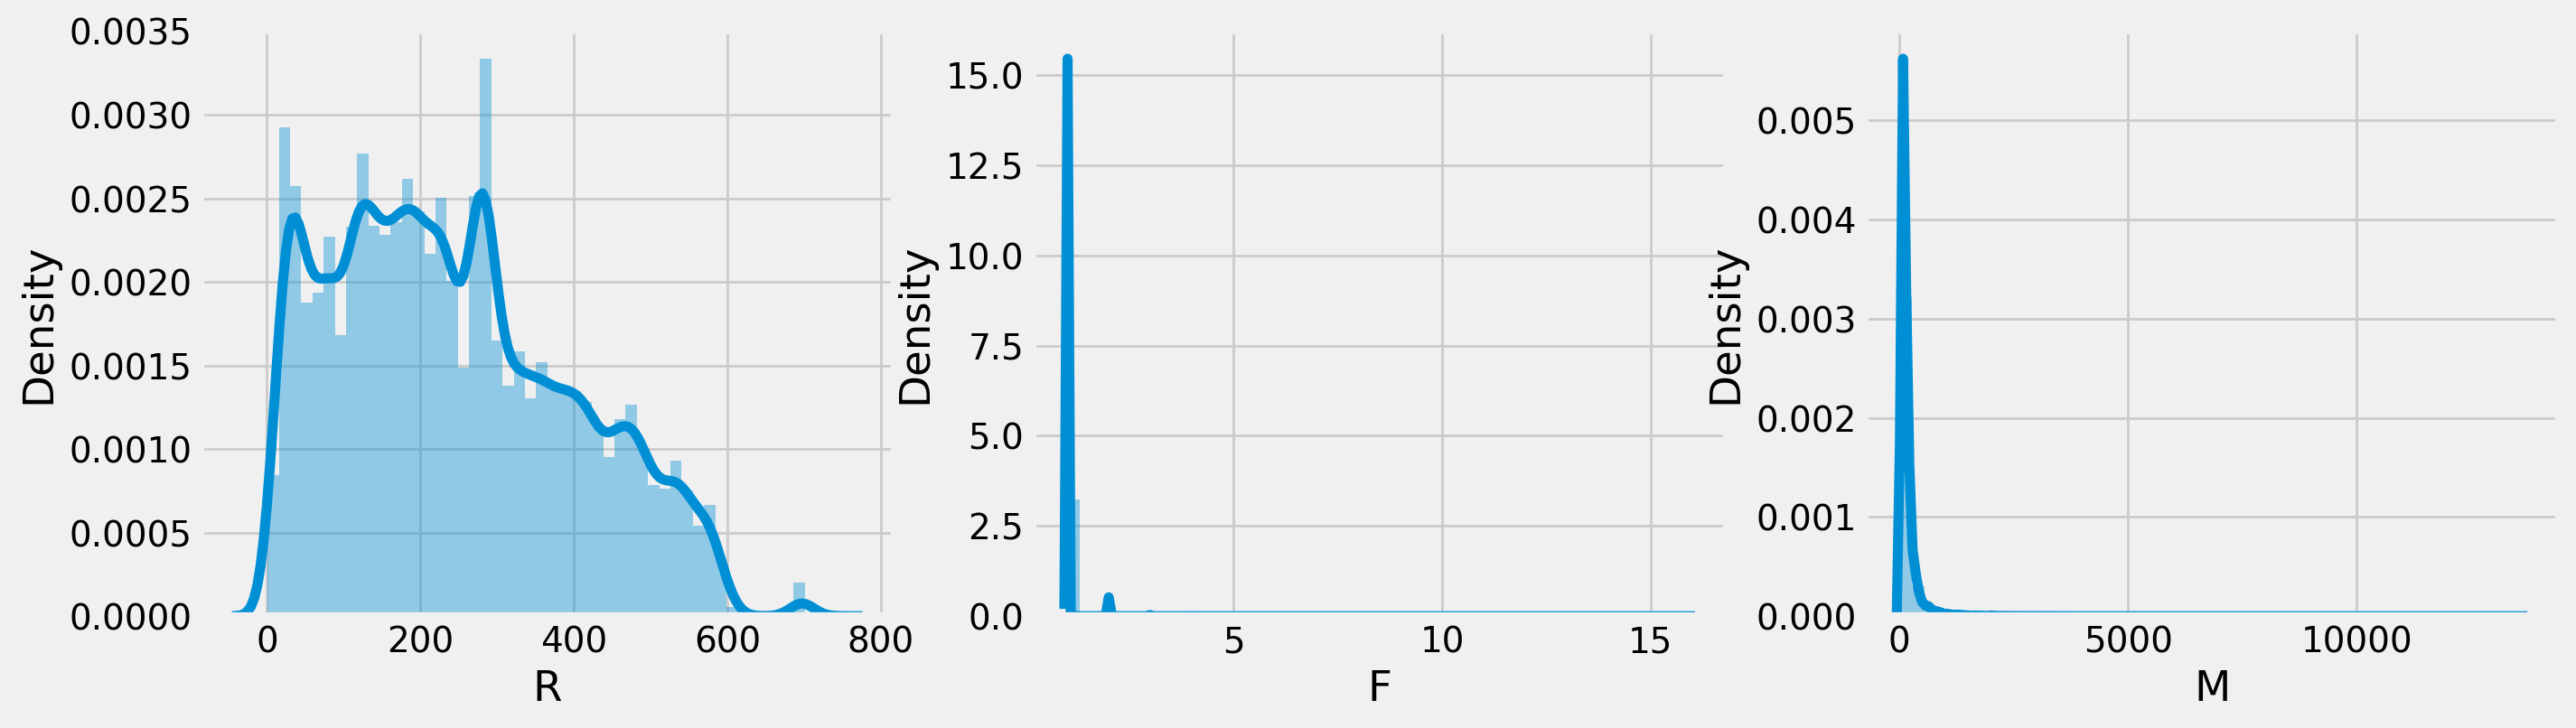

In [207]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

axes = axes.flatten()

for col, ax in zip(['R', 'F', 'M'], axes):
    sns.distplot(rfm_data[col], ax = ax)
    
plt.show()

In [209]:
percentile = [0.25, 0.5, 0.75, 0.9, 0.99]
rfm_data.R.describe(percentile)

count    94989.000000
mean       244.344482
std        152.993596
min          1.000000
25%        120.000000
50%        225.000000
75%        353.000000
90%        473.000000
99%        581.000000
max        730.000000
Name: R, dtype: float64

In [210]:
rfm_data.F.describe(percentile)

count    94989.000000
mean         1.033867
std          0.210828
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
90%          1.000000
99%          2.000000
max         16.000000
Name: F, dtype: float64

In [211]:
rfm_data.F.value_counts()

1     92101
2      2652
3       188
4        29
5         9
6         5
7         3
9         1
16        1
Name: F, dtype: int64

In [212]:
rfm_data.M.describe(percentile)

count    94989.000000
mean       165.694312
std        226.740844
min          9.590000
25%         63.100000
50%        107.900000
75%        182.940000
90%        318.970000
99%       1098.665600
max      13664.080000
Name: M, dtype: float64

In [213]:
# Recency: the later, the better
rfm_data['R_score'] = pd.qcut(rfm_data['R'], 5, labels = [5, 4, 3, 2, 1])\
                      .astype(str)
# R column contains difference from recent period. So less the value is, better score we give
# Using qcut we can devide records to have almost same quantity(5 groups)

rfm_data['F_score'] = rfm_data['F'].apply(lambda x : '1' if x == 1 else '2')
# 1 or not (label them as 2) -> 2 groups

rfm_data['M_score'] = pd.qcut(rfm_data['M'], 5, labels = [1, 2, 3, 4, 5])\
                      .astype(str)

In [214]:
print(
        rfm_data['R_score'].value_counts(normalize=True)\
                           .sort_index(), '\n\n',
        rfm_data['F_score'].value_counts(normalize=True)\
                           .sort_index(),'\n\n',
        rfm_data['M_score'].value_counts(normalize=True)\
                           .sort_index()
       )

1    0.199686
2    0.199276
3    0.200097
4    0.199518
5    0.201423
Name: R_score, dtype: float64 

 1    0.969596
2    0.030404
Name: F_score, dtype: float64 

 1    0.200034
2    0.200002
3    0.199960
4    0.200023
5    0.199981
Name: M_score, dtype: float64


In [215]:
rfm_data.loc[(rfm_data.R_score <='2') & (rfm_data.M_score >='3')]

,customer_unique_id,R,F,M,R_score,F_score,M_score
4,0004aac84e0df4da2b147fca70cf8255,294,1,196.89,2,1,4
8,0005e1862207bf6ccc02e4228effd9a0,549,1,150.12,1,1,4
11,00082cbe03e478190aadbea78542e933,289,1,126.26,2,1,3
14,000a5ad9c4601d2bbdd9ed765d5213b3,389,1,91.28,2,1,3
18,000de6019bb59f34c099a907c151d855,383,1,257.44,2,1,5
...,...,...,...,...,...,...,...
94962,ffebb6424578e7bb153322da9d65634f,596,1,665.70,1,1,5
94970,ffef0ffa736c7b3d9af741611089729b,463,1,139.07,1,1,4
94975,fff3a9369e4b7102fab406a334a678c3,389,1,102.74,2,1,3
94985,fffcf5a5ff07b0908bd4e2dbc735a684,453,1,2067.42,1,1,5


## Подготовка дашборда

Используйте шаблон с прошлолых семинаров и доокументацию: https://dash.plotly.com/?_gl=1*1eoisf0*_ga*OTc3NTI4MDY4LjE2Nzk1ODMyNzA.*_ga_6G7EE0JNSC*MTY4MDk0MTE3My4yNS4wLjE2ODA5NDExNzMuMC4wLjA.